<a href="https://colab.research.google.com/github/sakshigodse05/Deep-Learning/blob/main/MaxPooling_Stride.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


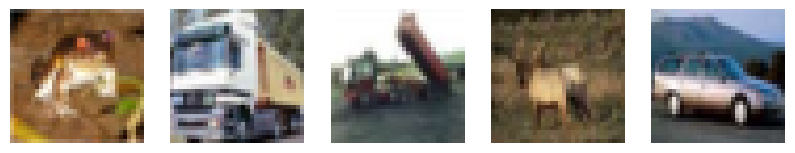

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
plt.show()

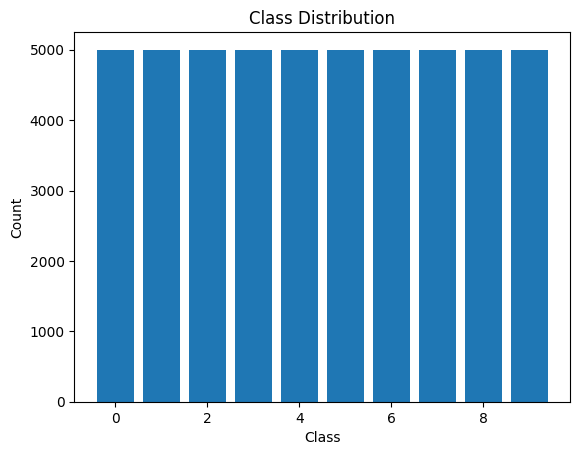

In [5]:
unique,counts=np.unique(y_train,return_counts=True)
plt.bar(unique,counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [6]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [7]:
x_val=x_train[:10000]
y_val=y_train[:10000]
x_train=x_train[:10000]
y_train=y_train[:10000]

In [8]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)
y_val=to_categorical(y_val,num_classes=10)

In [9]:



model=Sequential([
Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
MaxPooling2D((2,2)),
Conv2D(64,(3,3),activation='relu'),
MaxPooling2D((2,2)),
Flatten(),
Dense(128,activation='relu'),
Dropout(0.5),
Dense(10,activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
           loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.1780 - loss: 2.1681 - val_accuracy: 0.3942 - val_loss: 1.7346
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.3592 - loss: 1.7453 - val_accuracy: 0.4809 - val_loss: 1.4551
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.4357 - loss: 1.5466 - val_accuracy: 0.5254 - val_loss: 1.3483
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.4694 - loss: 1.4654 - val_accuracy: 0.5388 - val_loss: 1.2882
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.5051 - loss: 1.3818 - val_accuracy: 0.5806 - val_loss: 1.1792
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.5243 - loss: 1.3195 - val_accuracy: 0.5937 - val_loss: 1.1531
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.5512 - loss: 1.2479 - val_accuracy: 0.6376 - val_loss: 1.0592
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 116ms/step - accuracy: 0.5679 - loss: 1

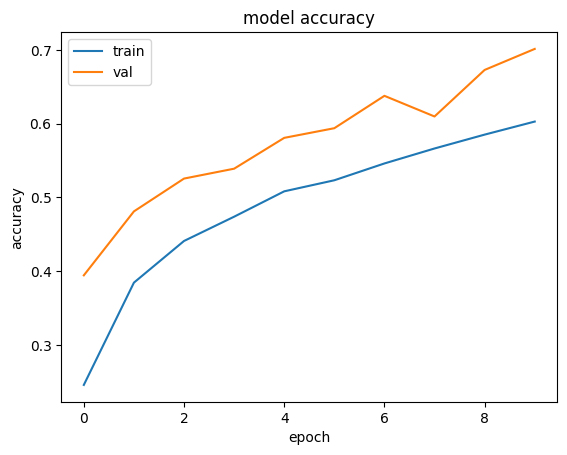

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

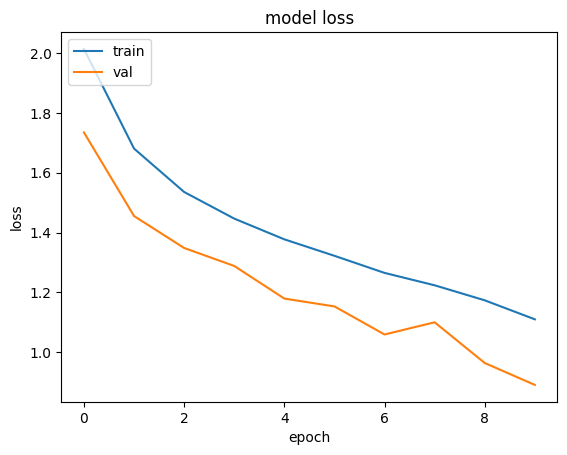

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [14]:
from sklearn.metrics import classification_report

loss,accuracy=model.evaluate(x_test,y_test)
print(f'Test Loss:{loss:.4f}')
print(f'Test Accuracy:{accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6002 - loss: 1.1446
Test Loss:1.1465
Test Accuracy:0.5988


In [15]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true_classes=np.argmax(y_test,axis=1)
print(classification_report(y_true_classes,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1000
           1       0.77      0.66      0.71      1000
           2       0.49      0.43      0.46      1000
           3       0.39      0.48      0.43      1000
           4       0.59      0.45      0.51      1000
           5       0.51      0.49      0.50      1000
           6       0.66      0.74      0.70      1000
           7       0.63      0.68      0.65      1000
           8       0.67      0.71      0.69      1000
           9       0.66      0.70      0.68      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



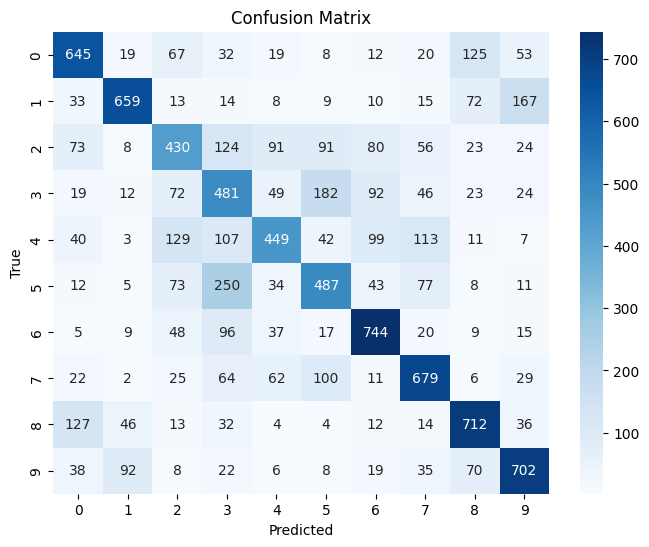

In [21]:

# Compute Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))  # Corrected: This line must be separate
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Labels and Title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
